In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
data_info = pd.read_csv("DATA/lending_club_info.csv",index_col="LoanStatNew")

In [16]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [17]:
def feat_info(col_name):
    print(data_info.loc[col_name]["Description"])

In [18]:
feat_info("loan_amnt")

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [19]:
df = pd.read_csv("DATA/lending_club_loan_two.csv")

In [20]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## Exploratory Data Analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

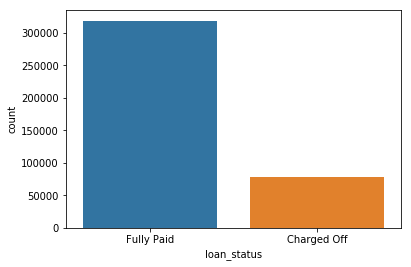

In [22]:
sns.countplot(x="loan_status",data=df)

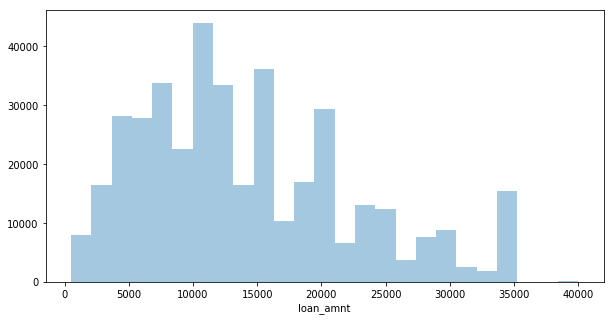

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(df["loan_amnt"],bins=25,kde=False)

In [24]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


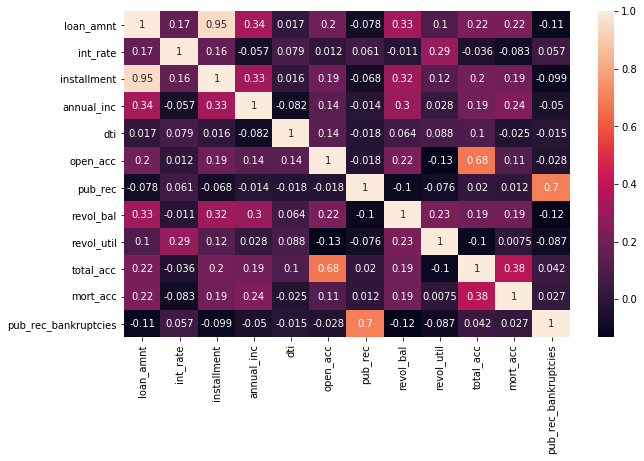

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [26]:
#By above heatmap, we can say that there is perfect relationship between loan_amnt and installment

In [27]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [28]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


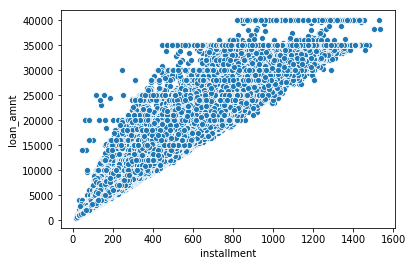

In [29]:
sns.scatterplot(x="installment",y="loan_amnt",data=df)

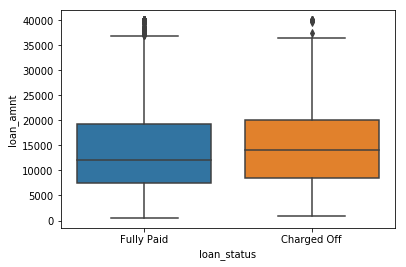

In [30]:
#to check the relationship between loan_amnt and loan_status
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

In [31]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [32]:
#Exploring the grade and subgrade columns that LendingClub attributes to the loan

In [33]:
sorted(df["grade"].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [34]:
sorted(df["sub_grade"].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

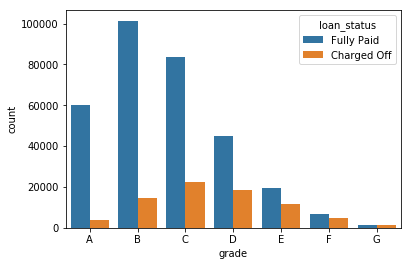

In [35]:
grade_order = sorted(df["grade"].unique())
sns.countplot(x="grade",data=df,hue="loan_status",order=grade_order)

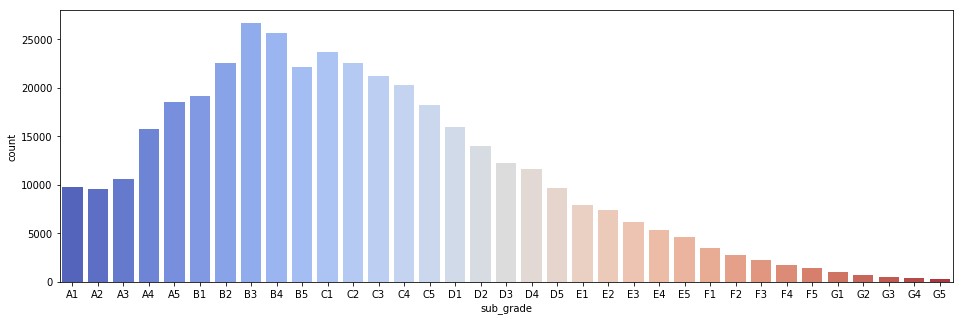

In [36]:
plt.figure(figsize=(16,5))
subgrade_order = sorted(df["sub_grade"].unique())
sns.countplot(x="sub_grade",data=df,order=subgrade_order,palette='coolwarm')

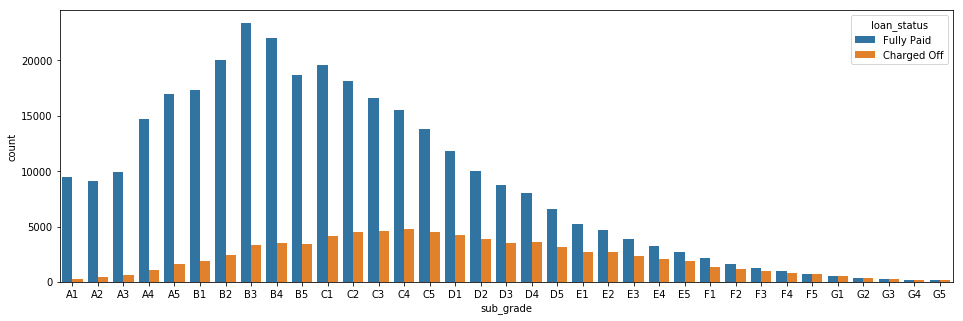

In [37]:
plt.figure(figsize=(16,5))
subgrade_order = sorted(df["sub_grade"].unique())
sns.countplot(x="sub_grade",data=df,order=subgrade_order,hue="loan_status")

In [38]:
f_and_g = df[(df["grade"] == "F") |  (df["grade"] =="G")]

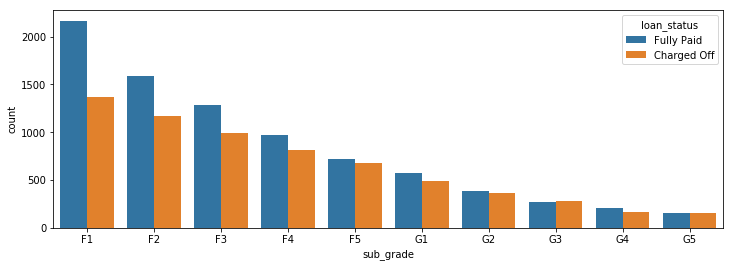

In [39]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [40]:
#creating a new column "loan_repaid" (will be used for label column) which will
#contain 1 is loan_status was Fully Paid and 0 if it was Charged Off

In [41]:
df["loan_repaid"] = df["loan_status"].map({"Fully Paid":1,"Charged Off":0})

In [42]:
df[["loan_status","loan_repaid"]]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
5,Fully Paid,1
6,Fully Paid,1
7,Fully Paid,1
8,Fully Paid,1
9,Fully Paid,1


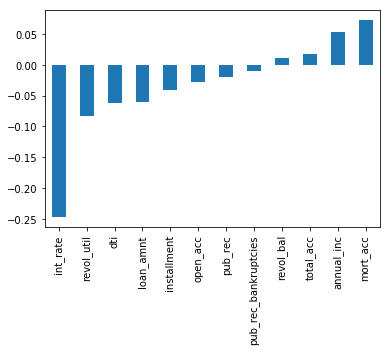

In [43]:
df.corr()["loan_repaid"][:-1].sort_values().plot(kind="bar")

## Data Preprocessing

##### Checking missing data

In [44]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [45]:
len(df)

396030

In [46]:
# missing Data in terms of % of the total Dataframe
100*(df.isnull().sum())/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [47]:
print(feat_info("emp_title"))
print("\n")
print(feat_info("emp_length"))

The job title supplied by the Borrower when applying for the loan.*
None


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


In [48]:
df["emp_title"].nunique()

173105

In [49]:
df["emp_title"].value_counts()

Teacher                               4389
Manager                               4250
Registered Nurse                      1856
RN                                    1846
Supervisor                            1830
Sales                                 1638
Project Manager                       1505
Owner                                 1410
Driver                                1339
Office Manager                        1218
manager                               1145
Director                              1089
General Manager                       1074
Engineer                               995
teacher                                962
driver                                 882
Vice President                         857
Operations Manager                     763
Administrative Assistant               756
Accountant                             748
President                              742
owner                                  697
Account Manager                        692
Police Offi

In [50]:
# There are too many unique emp_title to convert into dummy variable features.
# So,it's better to drop the emp_title column feature.
df = df.drop("emp_title",axis=1)

In [51]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [52]:
#
sorted_emp_length = sorted(df["emp_length"].dropna().unique())
# sns.countplot(x=sorted_emp_length,data=df)
sorted_emp_length

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

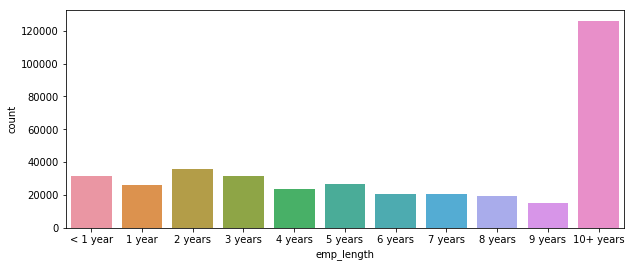

In [53]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
plt.figure(figsize=(10,4))
sns.countplot(x="emp_length",data=df,order=emp_length_order)

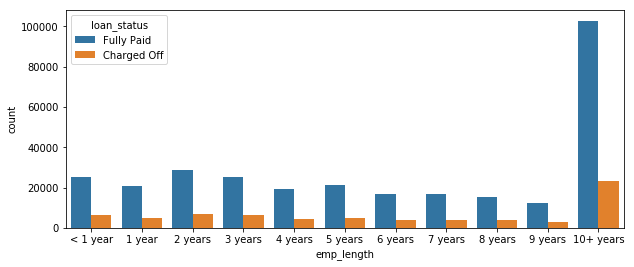

In [54]:
plt.figure(figsize=(10,4))
sns.countplot(x="emp_length",data=df,order=emp_length_order,hue="loan_status")

In [55]:
# we want to know the percentage of charge offs per category. Essentially informing us
# what percent of people per employment category didn't pay back their loan.


In [56]:
emp_co = df[df['loan_status'] == "Charged Off"].groupby("emp_length").count()["loan_status"]

In [57]:
emp_fp = df[df['loan_status'] == "Fully Paid"].groupby("emp_length").count()["loan_status"]

In [58]:
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [59]:
emp_len = emp_co/(emp_fp+emp_co)

In [60]:
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

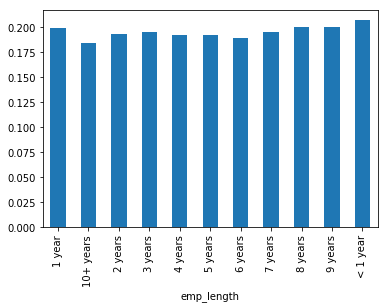

In [61]:
emp_len.plot(kind="bar")

In [62]:
# Charge off rates are extremely similar across all employment lengths. So better to drop the emp_length column.

df= df.drop("emp_length",axis=1)

In [63]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [64]:
df["title"].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [65]:
df["purpose"].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [66]:
# title column is simply the description of the purpose column leading to repeated information.
# so drop the title column.

In [67]:
df = df.drop("title",axis=1)

In [68]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [69]:
feat_info("mort_acc")

Number of mortgage accounts.


In [70]:
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [71]:
# review the other columsn to see which most highly correlates to mort_acc

print("Correlation with the mort_acc column")
df.corr()["mort_acc"].sort_values(ascending=False)

Correlation with the mort_acc column


mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [72]:
# Looks like the total_acc feature correlates with the mort_acc , 
# We will group the dataframe by the total_acc and calculate the 
# mean value for the mort_acc per total_acc entry
df.groupby("total_acc").mean()["mort_acc"].head()

total_acc
2.0    0.000000
3.0    0.052023
4.0    0.066743
5.0    0.103289
6.0    0.151293
Name: mort_acc, dtype: float64

In [73]:
total_acc_avg = df.groupby("total_acc").mean()["mort_acc"]

In [74]:
def fill_mort_acc(total_acc,mort_acc):
    
#     Accepts the total_acc and mort_acc values for the row.     
#     Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value     
#     for the corresponding total_acc value for that row.

    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [75]:
df["mort_acc"] = df.apply(lambda x : fill_mort_acc(x["total_acc"],x["mort_acc"]),axis=1)

In [76]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [77]:
df = df.dropna()

In [78]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

#### Categorical and Dummy Variables

In [79]:
df.select_dtypes("object").columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [80]:
df["term"].head(10)

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
5     36 months
6     36 months
7     36 months
8     60 months
9     36 months
Name: term, dtype: object

In [81]:
df["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [82]:
# df['term'] = df['term'].apply(lambda term: int(term[:3]))
df["term"].str.len()
df["term"] = df["term"].map({' 36 months':36,' 60 months':60})


In [83]:
df["term"]

0         36
1         36
2         36
3         36
4         60
5         36
6         36
7         36
8         60
9         36
10        36
11        36
12        36
13        60
14        36
15        36
16        60
17        60
18        36
19        36
20        36
21        36
22        36
23        36
24        36
25        36
26        36
27        36
28        36
29        36
          ..
396000    36
396001    60
396002    36
396003    36
396004    60
396005    60
396006    36
396007    36
396008    36
396009    60
396010    36
396011    36
396012    36
396013    36
396014    60
396015    36
396016    36
396017    36
396018    36
396019    36
396020    36
396021    36
396022    36
396023    36
396024    36
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [84]:
#grade is part of sub_grade. So we can drop grade.
df = df.drop("grade",axis=1)

In [85]:
#convert the sub_grade into dummy variables and concatenate to original dataframes
subgrade_dummies = pd.get_dummies(df["sub_grade"],drop_first=True)

In [86]:
df = pd.concat([df.drop("sub_grade",axis=1),subgrade_dummies],axis=1)

In [87]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [88]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [89]:
df["home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [90]:
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [91]:
#replace NONE and ANY with OTHER column.
df["home_ownership"] = df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [92]:
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [93]:
dummies = pd.get_dummies(df["home_ownership"],drop_first=True)
df = pd.concat([df.drop("home_ownership",axis=1),dummies],axis=1)

In [94]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,issue_d,loan_status,purpose,dti,...,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,...,0,0,0,0,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [96]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,issue_d,loan_status,purpose,dti,...,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,...,0,0,0,0,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df.select_dtypes(['object']).columns

Index(['verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [98]:
df["verification_status"].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [99]:
df["issue_d"].unique()

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015',
       'Apr-2015', 'Oct-2012', 'Jul-2014', 'Feb-2013', 'Oct-2015',
       'Jan-2014', 'Mar-2016', 'Apr-2014', 'Jun-2011', 'Apr-2010',
       'Jun-2014', 'Oct-2013', 'May-2013', 'Feb-2015', 'Oct-2011',
       'Jun-2015', 'Aug-2013', 'Feb-2014', 'Dec-2011', 'Mar-2013',
       'Jun-2016', 'Mar-2014', 'Nov-2013', 'Dec-2014', 'Apr-2016',
       'Sep-2013', 'May-2016', 'Jul-2015', 'Jul-2013', 'Aug-2014',
       'May-2008', 'Mar-2010', 'Dec-2013', 'Mar-2012', 'Mar-2015',
       'Sep-2011', 'Jul-2012', 'Dec-2012', 'Sep-2014', 'Nov-2012',
       'Nov-2015', 'Jan-2011', 'May-2012', 'Feb-2016', 'Jun-2012',
       'Aug-2012', 'Jan-2016', 'May-2015', 'Oct-2016', 'Aug-2015',
       'Jul-2016', 'May-2009', 'Aug-2016', 'Jan-2012', 'Jan-2013',
       'Nov-2010', 'Jul-2011', 'Mar-2011', 'Feb-2012', 'May-2011',
       'Aug-2010', 'Nov-2016', 'Jul-2010', 'Sep-2010', 'Dec-20

In [100]:
df["purpose"].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [101]:
df["earliest_cr_line"].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [102]:
df["initial_list_status"].unique()

array(['w', 'f'], dtype=object)

In [103]:
df["application_type"].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [104]:
#convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] 
#into dummy variables and concatenate them with the original dataframe

dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [105]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation',

In [106]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [107]:
df["address"].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [108]:
# Create a column called 'zip_code' that extracts the zip code from the address column.
df["zip_code"] = df["address"].apply(lambda address : address[-5:])

In [109]:
df["zip_code"].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [110]:
dummies = pd.get_dummies(df["zip_code"],drop_first=True)

In [111]:
df = pd.concat([df.drop(["zip_code","address"],axis=1),dummies],axis=1)

In [112]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_w

In [113]:
feat_info("issue_d")


The month which the loan was funded


In [114]:
#we wouldn't know beforehand whether or not a loan would be issued when using our model, 
# so in theory we wouldn't have an issue_date, drop this feature
df = df.drop("issue_d",axis=1)

In [115]:
feat_info("earliest_cr_line")

The month the borrower's earliest reported credit line was opened


In [116]:
#appears to be a historical time stamp feature. Extract the year from this feature
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [117]:
df.select_dtypes(["object"]).columns

Index(['loan_status'], dtype='object')

In [118]:
#loan_status feature already converted into loan_repaid
df = df.drop("loan_status",axis=1)

In [119]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', '05113', '11650', '22690',
       '29597', '

## Train Test Split

In [120]:
#Set X and y variables to the .values of the features and label.

X = df.drop("loan_repaid",axis=1).values
y = df["loan_repaid"].values

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Normalize the data

In [123]:
# Use MixMaxScaler to feature data X_train and X_test
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler = MinMaxScaler()

In [125]:
X_train = scaler.fit_transform(X_train)

In [126]:
X_test = scaler.transform(X_test)

## Creating the Model

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.constraints import max_norm

In [128]:
model = Sequential()

# input layer
model.add(Dense(78, activation="relu"))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation="relu"))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation="relu"))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1, activation="sigmoid"))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [129]:
#fit the model to the training data
model.fit(x = X_train,
          y = y_train,
          epochs = 25,
          batch_size = 256,
          validation_data = (X_test,y_test))

Epoch 1/25
1035/1035 [==============================] - 6s 5ms/step - loss: 0.3045 - val_loss: 0.2626
Epoch 2/25
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2670 - val_loss: 0.2606
Epoch 3/25
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2640 - val_loss: 0.2597
Epoch 4/25
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2628 - val_loss: 0.2595
Epoch 5/25
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2622 - val_loss: 0.2596
Epoch 6/25
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2617 - val_loss: 0.2592
Epoch 7/25
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2611 - val_loss: 0.2592
Epoch 8/25
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2605 - val_loss: 0.2589
Epoch 9/25
1035/1035 [==============================] - 5s 5ms/step - loss: 0.2604 - val_loss: 0.2589
Epoch 10/25
1035/1035 [==============================] - 5s 5ms/step - loss: 0.260

In [130]:
#saving the model
from tensorflow.keras.models import load_model
model.save('loan_data_model.h5')  

## Evaluation Model Performance

In [131]:
#Plot out the validation loss versus the training loss.

losses = pd.DataFrame(model.history.history)

In [132]:
losses.head()

,loss,val_loss
0,0.304477,0.262639
1,0.266970,0.260613
2,0.264024,0.259729
3,0.262816,0.259502
4,0.262249,0.259563


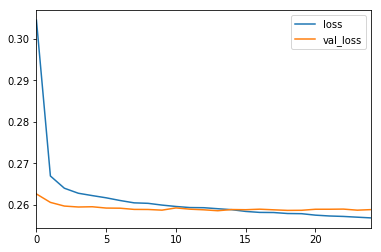

In [133]:
losses[["loss","val_loss"]].plot()

In [134]:
# predictions from the X_test set and  a classification report and confusion matrix for the X_test set.

predictions = model.predict_classes(X_test)

from sklearn.metrics import classification_report,confusion_matrix


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [135]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     25480
           1       0.88      1.00      0.94    104943

   micro avg       0.89      0.89      0.89    130423
   macro avg       0.93      0.72      0.77    130423
weighted avg       0.90      0.89      0.87    130423



In [136]:
confusion_matrix(y_test,predictions)

array([[ 11252,  14228],
       [   283, 104660]], dtype=int64)

In [137]:
#checking on random customer whether to offer him/her a loan
import random
random.seed(101)

random_ind = random.randint(0,len(df))

In [138]:
new_customer = df.drop("loan_repaid",axis=1).iloc[random_ind]

In [139]:
new_customer

loan_amnt                              25000.00
term                                      60.00
int_rate                                  18.24
installment                              638.11
annual_inc                             61665.00
dti                                       30.11
open_acc                                  16.00
pub_rec                                    0.00
revol_bal                              27778.00
revol_util                                65.50
total_acc                                 46.00
mort_acc                                   0.00
pub_rec_bankruptcies                       0.00
A2                                         0.00
A3                                         0.00
A4                                         0.00
A5                                         0.00
B1                                         0.00
B2                                         0.00
B3                                         0.00
B4                                      

In [140]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [141]:
#to check if he/she end up paying back the loan.
df.iloc[random_ind]["loan_repaid"]

1.0

In [142]:
#Fully paid